In [1]:
import time
import numpy as np
import pickle
#from DL_MR import *

import tensorflow as tf
from tensorflow import keras
from IPython.display import clear_output


%load_ext autoreload
%autoreload 2


In [2]:
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import scipy.io as sio

from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'



In [3]:
# load training data
training_data = np.load('../training_inputs/partitions/train_data_80.npy')
training_labels = np.load('../training_inputs/partitions/train_labels_80.npy')
# load validation data
validation_data = np.load('../training_inputs/partitions/train_data_20.npy')
validation_labels = np.load('../training_inputs/partitions/train_labels_20.npy')

In [11]:
model = keras.Sequential()
#model.add(keras.layers.InputLayer(32))
model.add(keras.layers.Dense(256,input_dim=32,kernel_initializer='glorot_uniform',activation='relu'))
model.add(keras.layers.Dense(256,kernel_initializer='glorot_uniform',activation='relu'))
model.add(keras.layers.Dense(128,kernel_initializer='glorot_uniform',activation='relu'))
model.add(keras.layers.Dense(40,kernel_initializer='glorot_uniform',activation='softmax'))

In [12]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss='mean_squared_error',
              metrics=['mae'])


In [13]:
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_loss',patience=100,),
                  keras.callbacks.ModelCheckpoint(filepath='trained_models/model_1.h5',monitor='val_loss',save_best_only=True,),
                  keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=30)
                 ]

In [14]:
num_epoch = 1000

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               8448      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 40)                5160      
Total params: 112,296
Trainable params: 112,296
Non-trainable params: 0
_________________________________________________________________


model.load_weights('./trained_models/model_4.h5')

In [16]:
%%time

history = model.fit(training_data, 
                    training_labels, 
                    epochs=num_epoch, 
                    batch_size=512,
                    callbacks=callbacks_list,
                    validation_data=(validation_data,validation_labels))

Train on 3039406 samples, validate on 7000 samples
Epoch 1/1000
3039406/3039406 [==============================] - 105s 35us/sample - loss: 2.0730e-04 - mae: 0.0059 - val_loss: 1.0214e-04 - val_mae: 0.0041
Epoch 2/1000
3039406/3039406 [==============================] - 103s 34us/sample - loss: 9.0416e-05 - mae: 0.0037 - val_loss: 8.6745e-05 - val_mae: 0.0035
Epoch 3/1000
3039406/3039406 [==============================] - 108s 36us/sample - loss: 7.0153e-05 - mae: 0.0032 - val_loss: 7.6599e-05 - val_mae: 0.0031
Epoch 4/1000
3039406/3039406 [==============================] - 98s 32us/sample - loss: 5.9370e-05 - mae: 0.0029 - val_loss: 5.4507e-05 - val_mae: 0.0029
Epoch 5/1000
3039406/3039406 [==============================] - 110s 36us/sample - loss: 5.3437e-05 - mae: 0.0027 - val_loss: 6.3512e-05 - val_mae: 0.0027
Epoch 6/1000
3039406/3039406 [==============================] - 108s 36us/sample - loss: 4.8898e-05 - mae: 0.0026 - val_loss: 4.5781e-05 - val_mae: 0.0026
Epoch 7/1000
3039406

3039406/3039406 [==============================] - 106s 35us/sample - loss: 1.7118e-05 - mae: 0.0015 - val_loss: 1.8591e-05 - val_mae: 0.0016
Epoch 54/1000
3039406/3039406 [==============================] - 101s 33us/sample - loss: 1.7111e-05 - mae: 0.0015 - val_loss: 1.8260e-05 - val_mae: 0.0016
Epoch 55/1000
3039406/3039406 [==============================] - 86s 28us/sample - loss: 1.7068e-05 - mae: 0.0015 - val_loss: 1.8398e-05 - val_mae: 0.0016
Epoch 56/1000
3039406/3039406 [==============================] - 107s 35us/sample - loss: 1.7012e-05 - mae: 0.0015 - val_loss: 1.8365e-05 - val_mae: 0.0016
Epoch 57/1000
3039406/3039406 [==============================] - 105s 34us/sample - loss: 1.6998e-05 - mae: 0.0015 - val_loss: 1.7763e-05 - val_mae: 0.0015
Epoch 58/1000
3039406/3039406 [==============================] - 97s 32us/sample - loss: 1.6930e-05 - mae: 0.0015 - val_loss: 1.8191e-05 - val_mae: 0.0016
Epoch 59/1000
3039406/3039406 [==============================] - 106s 35us/sampl

Epoch 106/1000
3039406/3039406 [==============================] - 96s 31us/sample - loss: 1.4922e-05 - mae: 0.0014 - val_loss: 1.6181e-05 - val_mae: 0.0015
Epoch 107/1000
3039406/3039406 [==============================] - 97s 32us/sample - loss: 1.4919e-05 - mae: 0.0014 - val_loss: 1.6183e-05 - val_mae: 0.0015
Epoch 108/1000
3039406/3039406 [==============================] - 106s 35us/sample - loss: 1.4919e-05 - mae: 0.0014 - val_loss: 1.6173e-05 - val_mae: 0.0015
Epoch 109/1000
3039406/3039406 [==============================] - 107s 35us/sample - loss: 1.4915e-05 - mae: 0.0014 - val_loss: 1.6154e-05 - val_mae: 0.0015
Epoch 110/1000
3039406/3039406 [==============================] - 103s 34us/sample - loss: 1.4914e-05 - mae: 0.0014 - val_loss: 1.6156e-05 - val_mae: 0.0015
Epoch 111/1000
3039406/3039406 [==============================] - 100s 33us/sample - loss: 1.4910e-05 - mae: 0.0014 - val_loss: 1.6169e-05 - val_mae: 0.0015
Epoch 112/1000
3039406/3039406 [============================

3039406/3039406 [==============================] - 105s 35us/sample - loss: 1.4810e-05 - mae: 0.0014 - val_loss: 1.6096e-05 - val_mae: 0.0015
Epoch 159/1000
3039406/3039406 [==============================] - 107s 35us/sample - loss: 1.4810e-05 - mae: 0.0014 - val_loss: 1.6091e-05 - val_mae: 0.0015
Epoch 160/1000
3039406/3039406 [==============================] - 94s 31us/sample - loss: 1.4810e-05 - mae: 0.0014 - val_loss: 1.6100e-05 - val_mae: 0.0015
Epoch 161/1000
3039406/3039406 [==============================] - 90s 30us/sample - loss: 1.4810e-05 - mae: 0.0014 - val_loss: 1.6095e-05 - val_mae: 0.0015
Epoch 162/1000
3039406/3039406 [==============================] - 100s 33us/sample - loss: 1.4810e-05 - mae: 0.0014 - val_loss: 1.6094e-05 - val_mae: 0.0015
Epoch 163/1000
3039406/3039406 [==============================] - 103s 34us/sample - loss: 1.4810e-05 - mae: 0.0014 - val_loss: 1.6086e-05 - val_mae: 0.0015
Epoch 164/1000
3039406/3039406 [==============================] - 103s 34us

3039406/3039406 [==============================] - 95s 31us/sample - loss: 1.4805e-05 - mae: 0.0014 - val_loss: 1.6092e-05 - val_mae: 0.0015
Epoch 211/1000
3039406/3039406 [==============================] - 100s 33us/sample - loss: 1.4805e-05 - mae: 0.0014 - val_loss: 1.6091e-05 - val_mae: 0.0015
Epoch 212/1000
3039406/3039406 [==============================] - 105s 34us/sample - loss: 1.4804e-05 - mae: 0.0014 - val_loss: 1.6091e-05 - val_mae: 0.0015
Epoch 213/1000
3039406/3039406 [==============================] - 96s 32us/sample - loss: 1.4804e-05 - mae: 0.0014 - val_loss: 1.6090e-05 - val_mae: 0.0015
Epoch 214/1000
3039406/3039406 [==============================] - 105s 35us/sample - loss: 1.4804e-05 - mae: 0.0014 - val_loss: 1.6090e-05 - val_mae: 0.0015
Epoch 215/1000
3039406/3039406 [==============================] - 107s 35us/sample - loss: 1.4804e-05 - mae: 0.0014 - val_loss: 1.6090e-05 - val_mae: 0.0015
Epoch 216/1000
3039406/3039406 [==============================] - 105s 35us

In [17]:
with open('train_history/train_history_1', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

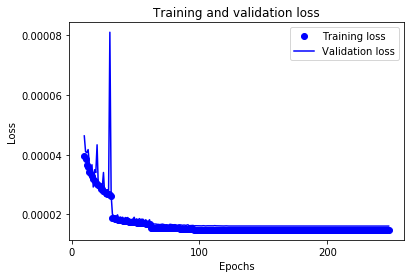

In [18]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(10, len(loss_values)+1)
plt.plot(epochs, loss_values[9:], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values[9:], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 25})
plt.savefig('trained_models/figures/training_val_loss_model_1', dpi=300)
plt.show()